# 

<KeysViewHDF5 ['S_q_sublattice', 'Sz_data', 'basis_vectors', 'lattice_size', 'n_samples', 'primitive_basis_vectors', 'sublattice_offsets']>
Basis vectors:
 [[0. 4. 4.]
 [4. 0. 4.]
 [4. 4. 0.]]
<Sz> sl 0 = [0.00021341]±[0.00682927] (exp. [0.99999995])
<Sz> sl 1 = [0.00414634]±[0.13268293] (exp. [0.99998281])
<Sz> sl 2 = [-0.00362805]±[0.11609756] (exp. [0.99998684])
<Sz> sl 3 = [0.00057927]±[0.01853659] (exp. [0.99999966])


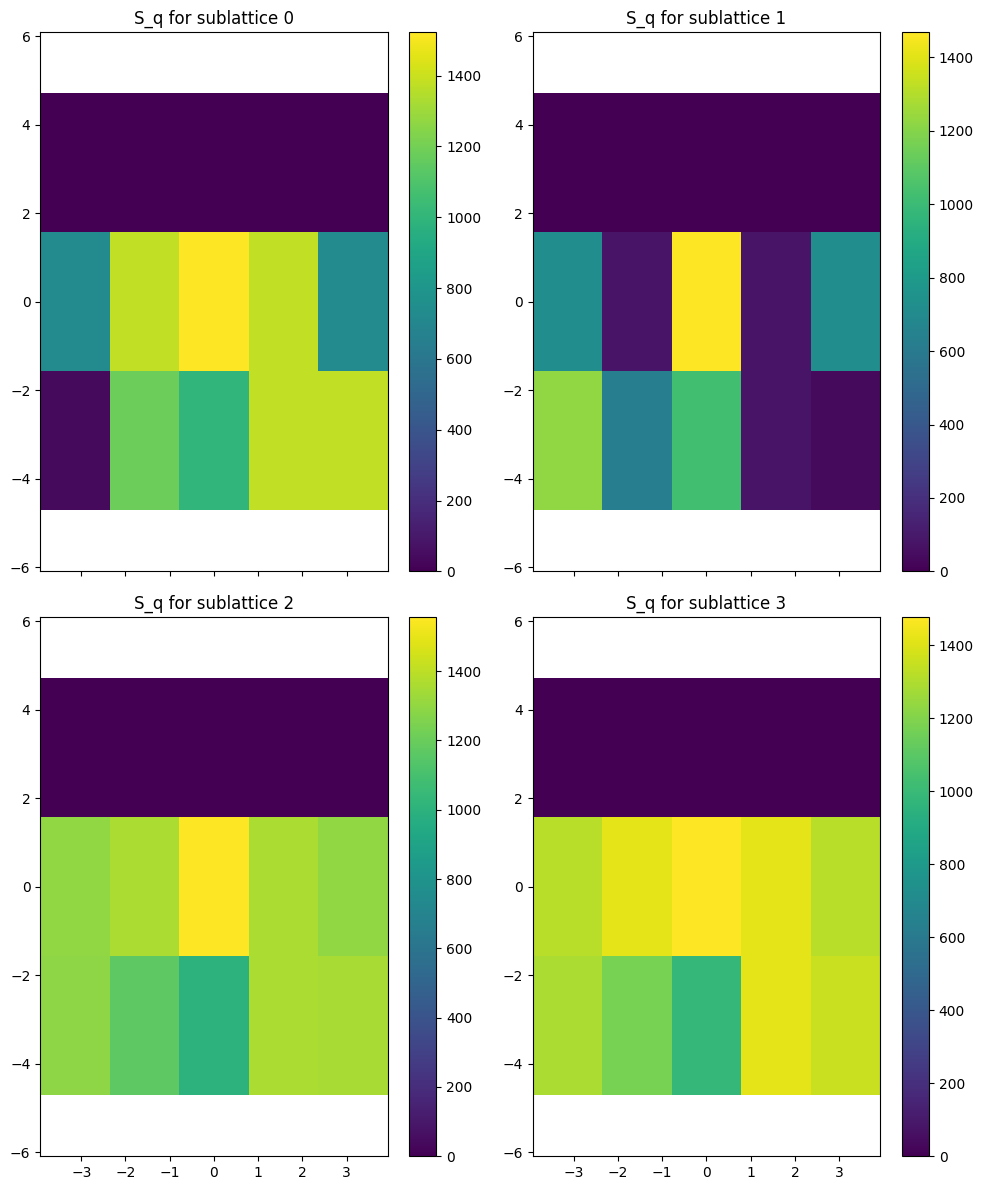

In [27]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

filename = "../../tmp/L=4&n_sweeps=1025&n_loop=0&n_local=128&T=0.5&seed=0x100&.ssf.h5"


cmap = plt.get_cmap('plasma')

with h5py.File(filename, 'r') as f:

    print(f.keys())
    
    # # Read lattice size
    L = int(f['lattice_size'][0])
    # print("Lattice size:", lattice_size)

    # # Number of samples
    n_samples = f['n_samples'][()]
    # print("Number of samples:", n_samples)

    # Basis vectors
    basis_vectors = f['primitive_basis_vectors'][:]
    print("Basis vectors:\n", basis_vectors)

    k_basis_vectors = np.linalg.inv(f['basis_vectors'][:] / L).T

    # # Sublattice offsets
    sublattice_offsets = f['sublattice_offsets'][:]
    # print("Sublattice offsets:\n", sublattice_offsets)

    # Sz raw
    Sz_raw = f['Sz_data'][:]
    for sl in range(4):
        mu = np.mean(Sz_raw[sl])/n_samples
        S2 = np.mean(Sz_raw[sl])**2/n_samples
        print(f"<Sz> sl {sl} = {mu}±{np.sqrt(S2 - mu**2)} (exp. {np.sqrt(1-mu**2)**2})")

    # Now read and plot S_q for each sublattice
    n_sublattices = sublattice_offsets.shape[0]
    fig, Ax = plt.subplots(2, 2, figsize=(10, 3 * n_sublattices), sharex=True)
    axs = Ax.ravel()
    

    x = np.linspace(-np.pi, np.pi, L+1);
    y = np.linspace(-np.pi, np.pi, L//2+1);

    X, Y = np.meshgrid(x, y, indexing='ij')

    coords = np.vstack([X.ravel(), Y.ravel() ])
    # transformed_coords = 0.5*np.array([[1,1],[-1,1]]) @ coords
    transformed_coords = coords

    X_t = transformed_coords[0].reshape(X.shape)
    Y_t = transformed_coords[1].reshape(Y.shape)
    # print(transformed_coords)

    S_q = f['S_q_sublattice'][:]
    for sl in range(n_sublattices):
        
        
        im = axs[sl].pcolormesh(X_t, Y_t, np.abs(S_q[sl]))
        # axs[sl].pcolormesh((X_t-2*np.pi), Y_t, np.abs(S_q))
        # axs[sl].pcolormesh((X_t-2*np.pi), (Y_t-2*np.pi), np.abs(S_q))
        # axs[sl].pcolormesh((X_t), (Y_t-2*np.pi), np.abs(S_q))
        
        axs[sl].set_title(f'S_q for sublattice {sl}')
        axs[sl].axis('equal')
        fig.colorbar(im, ax=axs[sl])
       

    plt.tight_layout()
    plt.show()
